
# Binary Prediction of Poisonous Mushrooms 
### Group Members: Matheus Liotti, Rafael Campeão, Rodrigo de Sousa
## Supervised Learning - IART 2nd Assignment

The second practical assignment of IART focuses on the application of Supervised Learning techniques in
the context of classification problems. The goal is to develop and evaluate machine learning models capable
of learning from labeled data to make accurate predictions regarding a specific target variable (or concept).

## Machine Learning Problem
In this notebook, we will work with a dataset containing information about various mushroom species to predict whether a mushroom is poisonous or edible, in a binary classification problem. Using this dataset, we will explore different classification algorithms and evaluate their performance in predicting the target variable.


### 4. Load Libraries

In [30]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn.ensemble import GradientBoostingClassifier
import time

### 5. First Model - Decision Tree Classifier
Decision Trees are a popular and interpretable classification algorithm that can handle both categorical and numerical data. They work by recursively splitting the data based on feature values to create a tree-like structure, where each leaf node represents a class label.

In [2]:
# Load the dataset
df = pd.read_csv('data/balanced_train.csv')

# Sampling for Prototyping (remove this for full training)
df = df.sample(n=1000000, random_state=420)

# Feature/Target Split
X = df.drop("class", axis=1)
y = df["class"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=420
)

# Use OrdinalEncoder (faster and scalable for Decision Trees)
categorical_features = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), categorical_features)
    ]
)

# Define Pipeline with a Decision Tree
pipeline_dt = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("classifier", DecisionTreeClassifier(random_state=420))
    ]
)

# Train the Model (timed)
start_train = time.time()
pipeline_dt.fit(X_train, y_train)
end_train = time.time()
print(f"\nTraining completed in {end_train - start_train:.3f} seconds")

# Test the Model (timed)
start_test = time.time()
y_pred = pipeline_dt.predict(X_test)
end_test = time.time()
print(f"\nTesting completed in {end_test - start_test:.3f} seconds")

# Evaluation
print(f"\nAccuracy: {(accuracy_score(y_test, y_pred)*100):.2f}%")


Training completed in 31.612 seconds

Testing completed in 1.391 seconds

Accuracy: 95.93%


### 5.1 Classification Reports, Confusion Matrix and Feature Importance

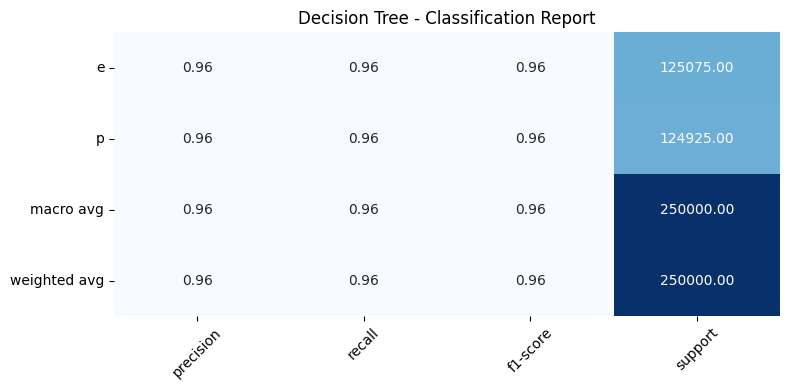

In [3]:
# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame (drop "accuracy" which isn't per-class)
report_df = pd.DataFrame(report_dict).transpose()

# Optional: keep only relevant rows
report_df = report_df.loc[["e", "p", "macro avg", "weighted avg"]]

# Round values for display
report_df = report_df.round(2)

# Plot as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:, :4], annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Decision Tree - Classification Report")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

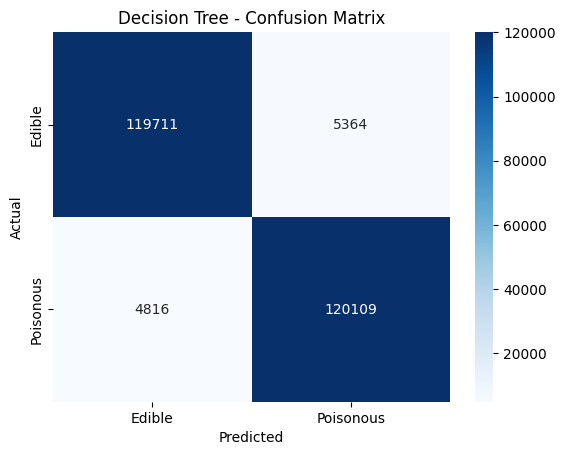

In [4]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", 
            xticklabels=["Edible", "Poisonous"], 
            yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

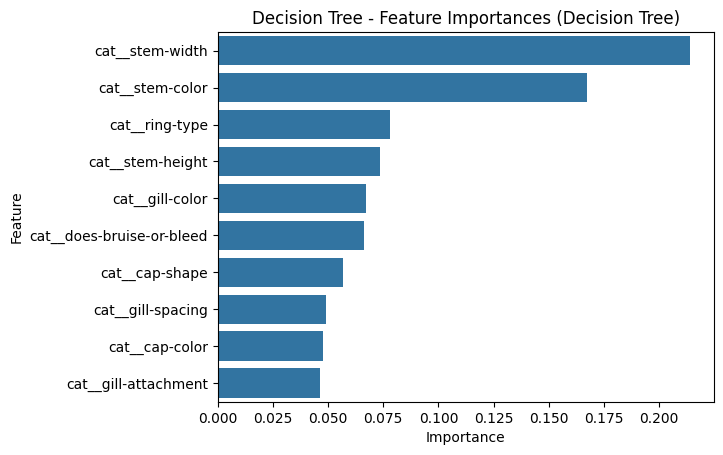

In [5]:
# Feature Importance
importances = pipeline_dt.named_steps["classifier"].feature_importances_
feature_names = pipeline_dt.named_steps["preprocessing"].get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values("Importance", ascending=False).head(10)

sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Decision Tree - Feature Importances (Decision Tree)")
plt.show()

### 6. Second Model -  Random Forest Classifier
Random Forest is an ensemble learning method that combines multiple decision trees to improve classification accuracy and reduce overfitting. It works by training multiple decision trees on different subsets of the data and aggregating their predictions.

In [6]:
df = pd.read_csv('data/balanced_train.csv')

# Sampling for Prototyping (remove this for full training)
df = df.sample(n=1000000, random_state=420)

# Split Features and Target
X = df.drop("class", axis=1)
y = df["class"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=420
)

# Preprocessing (Ordinal Encoding for categorical features)
categorical_features = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), categorical_features)
    ]
)

# Define Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=420,
    n_jobs=-1
)

pipeline_rf = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("classifier", rf_model)
    ]
)

# Train the Model (with timing)
start_train = time.time()
pipeline_rf.fit(X_train, y_train)
end_train = time.time()
print(f"\nTraining completed in {end_train - start_train:.2f} seconds")

# Test the Model (with timing)
start_test = time.time()
y_pred_rf = pipeline_rf.predict(X_test)
end_test = time.time()
print(f"\nTesting completed in {end_test - start_test:.4f} seconds")

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))


Training completed in 41.58 seconds

Testing completed in 2.0318 seconds

Accuracy: 0.985012


### 6.1 Classification Reports, Confusion Matrix and Feature Importance

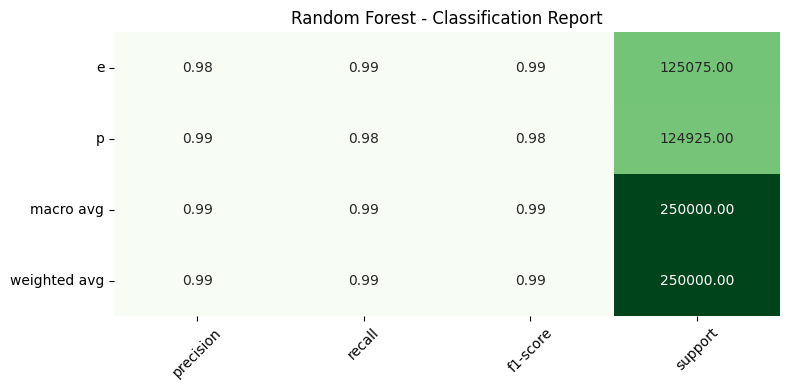

In [7]:
# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred_rf, output_dict=True)

# Convert to DataFrame (drop "accuracy" which isn't per-class)
report_df = pd.DataFrame(report_dict).transpose()

# Optional: keep only relevant rows
report_df = report_df.loc[["e", "p", "macro avg", "weighted avg"]]

# Round values for display
report_df = report_df.round(2)

# Plot as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:, :4], annot=True, fmt=".2f", cmap="Greens", cbar=False)
plt.title("Random Forest - Classification Report")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

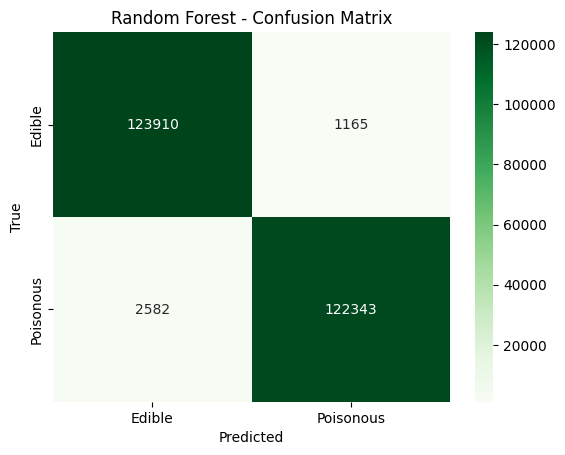

In [8]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Edible", "Poisonous"],
            yticklabels=["Edible", "Poisonous"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

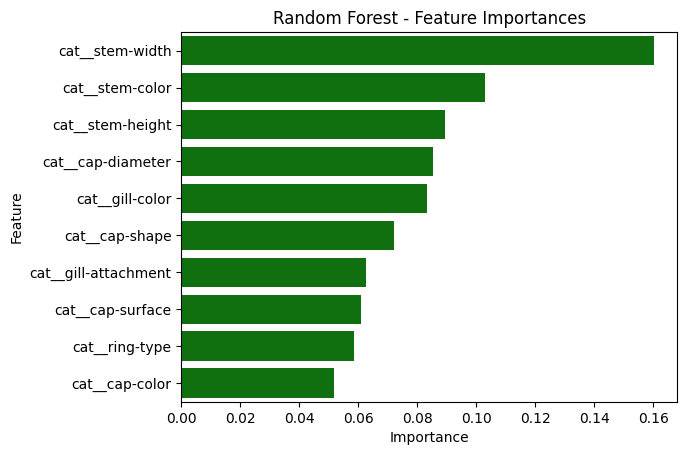

In [9]:
# Feature Importance
importances = pipeline_rf.named_steps["classifier"].feature_importances_
feature_names = pipeline_rf.named_steps["preprocessing"].get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values("Importance", ascending=False).head(10)

sns.barplot(x="Importance", y="Feature", data=importance_df, color="green")
plt.title("Random Forest - Feature Importances")
plt.show()

In [16]:
# Load the dataset


df = pd.read_csv('data/balanced_train.csv')

df = df.drop(columns=['id'])

for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Feature/Target Split
X = df.drop("class", axis=1)
y = df["class"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=420
)


model = GaussianNB()


# Train the Model (timed)
start_train = time.time()
model.fit(X_train, y_train)
end_train = time.time()
print(f"\nTraining completed in {end_train - start_train:.3f} seconds")

# Test the Model (timed)
start_test = time.time()
y_pred_nb=model.predict(X_test)
end_test = time.time()
print(f"\nTesting completed in {end_test - start_test:.3f} seconds")

# Evaluation
print(f"\nAccuracy: {(accuracy_score(y_test, y_pred_nb)*100):.2f}%")


Training completed in 0.836 seconds

Testing completed in 0.294 seconds

Accuracy: 65.31%


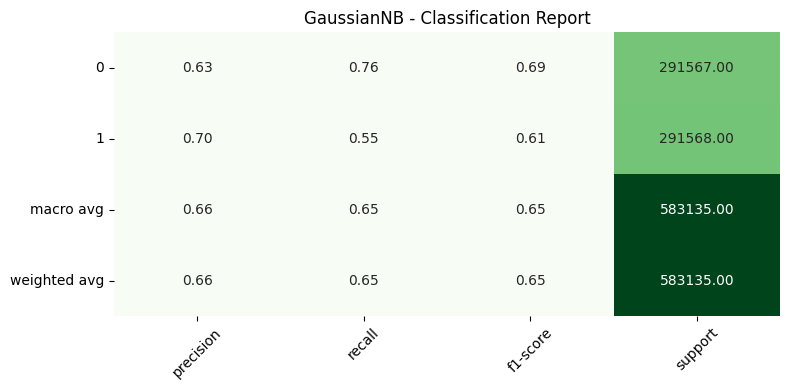

In [22]:
# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred_nb, output_dict=True)

# Convert to DataFrame (drop "accuracy" which isn't per-class)
report_df = pd.DataFrame(report_dict).transpose()

# Optional: keep only relevant rows
report_df = report_df.loc[["0", "1", "macro avg", "weighted avg"]]

# Round values for display
report_df = report_df.round(2)

# Plot as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:, :4], annot=True, fmt=".2f", cmap="Greens", cbar=False)
plt.title("GaussianNB - Classification Report")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

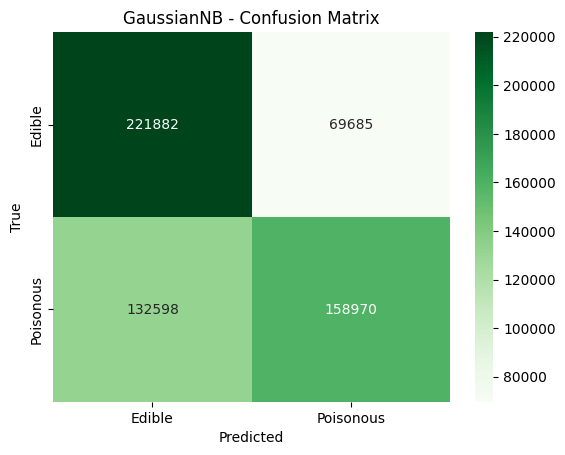

In [23]:
# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Edible", "Poisonous"],
            yticklabels=["Edible", "Poisonous"])
plt.title("GaussianNB - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [34]:
df = pd.read_csv("data/balanced_train.csv")
df = df.drop(columns=['id'])
X = df.drop(columns=["class"])  # Replace with actual target column
y = df["class"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), categorical_features)
    ]
)


# Train GBM model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)


pipeline_gbm=Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("classifier", gbm_model)
    ]
    
)
# Train the Model (with timing)
start_train = time.time()
pipeline_gbm.fit(X_train, y_train)
end_train = time.time()
print(f"\nTraining completed in {end_train - start_train:.2f} seconds")

# Test the Model (with timing)
start_test = time.time()
y_pred_gbm = pipeline_gbm.predict(X_test)
end_test = time.time()
print(f"\nTesting completed in {end_test - start_test:.4f} seconds")

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred_gbm))



Training completed in 706.33 seconds

Testing completed in 3.6211 seconds

Accuracy: 0.9285199825083386


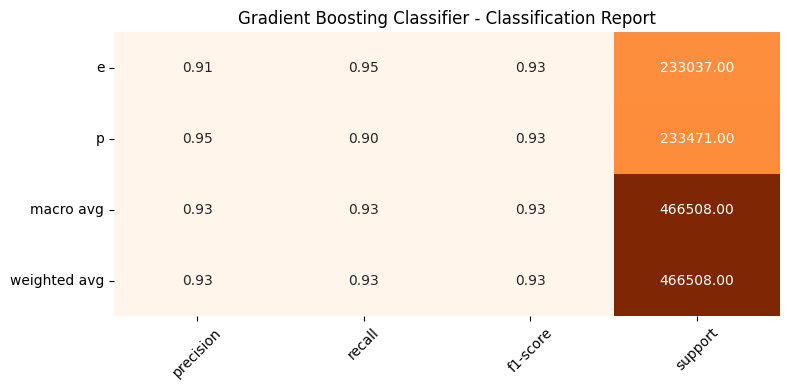

In [38]:
# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred_gbm, output_dict=True)

# Convert to DataFrame (drop "accuracy" which isn't per-class)
report_gbm = pd.DataFrame(report_dict).transpose()

# Optional: keep only relevant rows
report_gbm = report_gbm.loc[["e", "p", "macro avg", "weighted avg"]]

# Round values for display
report_gbm = report_gbm.round(2)

# Plot as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_gbm.iloc[:, :4], annot=True, fmt=".2f", cmap="Oranges", cbar=False)
plt.title("Gradient Boosting Classifier - Classification Report")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

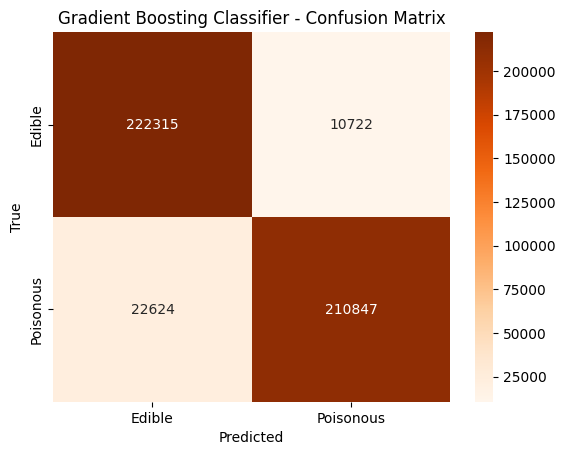

In [39]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_gbm)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Edible", "Poisonous"],
            yticklabels=["Edible", "Poisonous"])
plt.title("Gradient Boosting Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

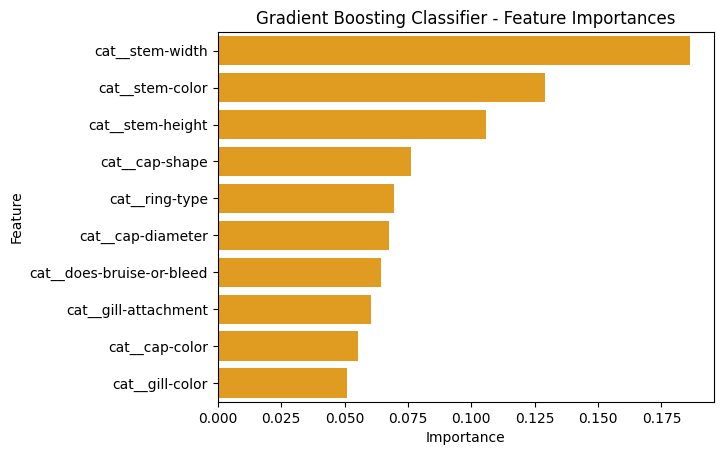

In [40]:
# Feature Importance
importances = pipeline_gbm.named_steps["classifier"].feature_importances_
feature_names = pipeline_gbm.named_steps["preprocessing"].get_feature_names_out()
importance_gbm = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_gbm = importance_gbm.sort_values("Importance", ascending=False).head(10)

sns.barplot(x="Importance", y="Feature", data=importance_gbm, color="orange")
plt.title("Gradient Boosting Classifier - Feature Importances")
plt.show()